##### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [5]:
X_st = X.copy().astype(np.float64)
X_st[1] = calc_std_fit(X[1])
X_st[2] = calc_std_fit(X[2])
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [6]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [7]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [17]:
lambda_list = np.linspace(1e-4, 1e2, 100)
w_list = []
for ll in lambda_list:
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=ll)
    w_list.append(W)

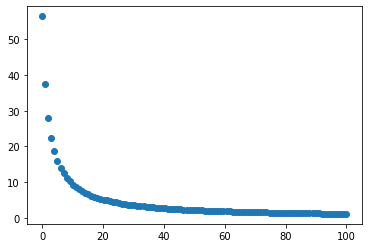

In [18]:
plt.scatter(lambda_list, [x[0] for x in w_list])

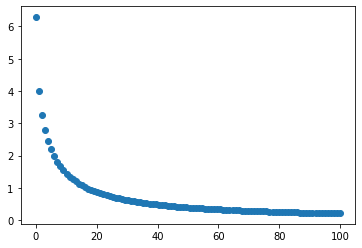

In [19]:
plt.scatter(lambda_list, [x[1] for x in w_list])

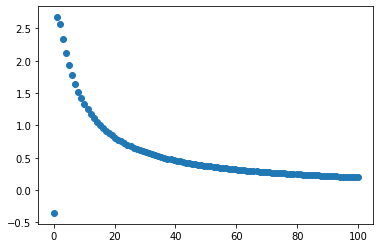

In [20]:
plt.scatter(lambda_list, [x[2] for x in w_list])

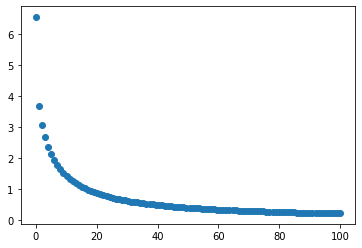

In [21]:
plt.scatter(lambda_list, [x[3] for x in w_list])

##### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Одновременно данные не могут быть нормализованными и стандартизованными, так как у стандартизованных данных среднее равно 0, следовательно присутствуют как положительные, так и отрицительные значение, а у нормализованных данных все значения располагаются на отрезке от 0 до 1. 

##### 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [24]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))

    return W